*This notebook is partially adapted from the [Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do) by Jake VanderPlas; the content is available [on GitHub](https://github.com/jakevdp/PythonDataScienceHandbook).*

*The text is released under the [CC-BY-NC-ND license](https://creativecommons.org/licenses/by-nc-nd/3.0/us/legalcode), and code is released under the [MIT license](https://opensource.org/licenses/MIT). 

And some parts are also by Viviana Acquaviva (license: BSD).

# k-Means Clustering

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

## Introducing k-Means

The *k*-means algorithm searches for a pre-determined number of clusters within an unlabeled multidimensional dataset.
It accomplishes this using a simple conception of what the optimal clustering looks like:

- The "cluster center" is the arithmetic mean of all the points belonging to the cluster.
- Each point is closer to its own cluster center than to other cluster centers.

Those two assumptions are the basis of the *k*-means model.

First, let's generate a two-dimensional dataset containing four distinct blobs, using the amazing function "make_blobs".


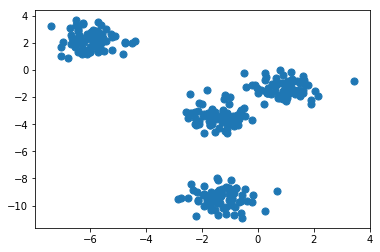

In [4]:
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=2)

#note: y_true contains the "true" labels but we won't use them!
plt.scatter(X[:, 0], X[:, 1], s=50);

By eye, it is relatively easy to pick out the four clusters.
The *k*-means algorithm does this automatically, but we need to let it know how many blobs we expect.

In [5]:
from sklearn.cluster import KMeans

####
kmeans = KMeans(n_clusters=4)
y_kmeans = kmeans.fit_predict(X)
centroids = kmeans.cluster_centers_

What are the the possible y_means values and what do they mean?

In [6]:
y_kmeans

array([2, 2, 3, 2, 1, 0, 2, 0, 3, 2, 1, 2, 2, 0, 0, 1, 3, 0, 1, 2, 0, 0,
       3, 1, 2, 1, 3, 1, 0, 1, 3, 2, 3, 3, 0, 3, 0, 2, 2, 3, 3, 0, 1, 2,
       3, 0, 0, 0, 0, 1, 3, 1, 0, 3, 1, 0, 3, 0, 0, 2, 2, 3, 3, 1, 3, 0,
       2, 2, 1, 1, 0, 1, 0, 0, 2, 2, 2, 1, 3, 3, 0, 0, 1, 0, 3, 1, 1, 3,
       3, 0, 1, 0, 2, 0, 2, 2, 1, 2, 1, 1, 2, 3, 2, 0, 1, 3, 2, 0, 2, 2,
       1, 0, 0, 0, 2, 1, 1, 0, 3, 0, 1, 3, 1, 0, 2, 3, 1, 3, 3, 0, 3, 2,
       3, 1, 2, 3, 3, 2, 1, 2, 2, 1, 2, 0, 1, 3, 2, 1, 3, 3, 3, 0, 3, 1,
       1, 3, 1, 1, 0, 0, 0, 3, 3, 2, 3, 1, 0, 0, 2, 2, 3, 0, 3, 2, 2, 1,
       3, 3, 0, 2, 2, 3, 3, 1, 2, 3, 1, 0, 3, 1, 2, 0, 2, 1, 3, 1, 3, 1,
       2, 2, 3, 3, 1, 2, 1, 2, 2, 0, 3, 1, 3, 0, 2, 2, 1, 1, 0, 1, 1, 3,
       1, 1, 0, 1, 0, 0, 3, 2, 1, 3, 0, 0, 1, 1, 3, 2, 0, 3, 1, 2, 1, 2,
       3, 1, 0, 1, 2, 0, 1, 0, 1, 0, 3, 0, 1, 1, 1, 0, 0, 2, 0, 3, 3, 0,
       0, 2, 0, 3, 0, 2, 3, 1, 2, 3, 0, 3, 2, 1, 2, 3, 2, 2, 0, 3, 2, 2,
       2, 2, 2, 0, 1, 2, 3, 0, 0, 1, 3, 1, 3, 2], d

Let's visualize the results by plotting the data colored by these labels.
We will also plot the cluster centers as determined by the *k*-means estimator:

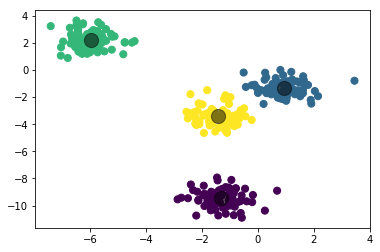

In [7]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_

plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

The good news is that the *k*-means algorithm (at least in this simple case) assigns the points to clusters very similarly to how we might assign them by eye.

#### The lines below run the algorithm and plot the results of the k-means algorithm. We will play with different settings to see what happens.


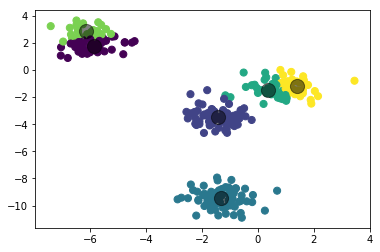

In [12]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

centers = kmeans.cluster_centers_
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

The SSE (Sum of Squared Errors) is called "inertia" in sklearn.

In [11]:
kmeans.inertia_

223.99155979455853

The lines below are a non-sophisticated way to visualize the evolution of centroid positions as a function of number of iterations.

Take a look at the code and the figure. Do you think the centroids have converged? You can also play with the random seed to obtain different cases.

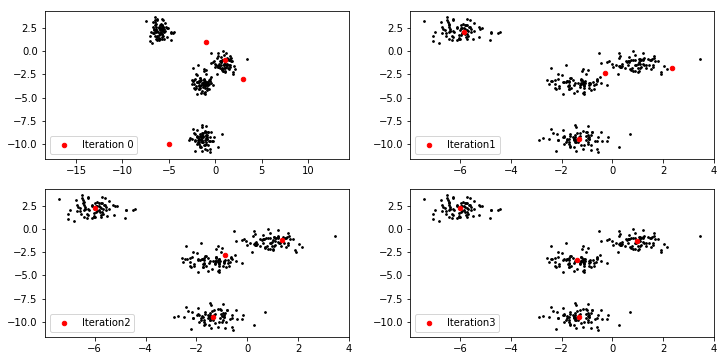

In [13]:
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.6, random_state=2)

#plt.gca().set_prop_cycle(plt.cycler('color', plt.cm.hot(np.linspace(0, 2, 20))))
#The line above picks a bunch of colors
fig = plt.figure(figsize=(12,6))



start = np.array([[-1,1],[1,-1],[3,-3],[-5,-10]])

plt.subplot(2,2,1)
plt.axis('equal')
plt.scatter(X[:, 0], X[:, 1], s =3, c ='k') # plot original points
plt.scatter(start[:,0],start[:,1], s = 20, c = 'r', label = 'Iteration 0')
plt.legend(loc='lower left');

for i in range(1,4):
    plt.subplot(2,2,i+1)
    plt.scatter(X[:, 0], X[:, 1], s =3, c ='k') # plot original points
    kmeans = KMeans(n_clusters=4, max_iter=i, init=start, n_init=1)
    #14 works, #16 doesn't
    kmeans.fit(X)
    y_kmeans = kmeans.predict(X)
    centers = kmeans.cluster_centers_
    plt.scatter(centers[:, 0], centers[:, 1], s=20, label = 'Iteration'+str(i), c = 'r');
    plt.legend(loc='lower left');
    

Finally, we can look at differently shaped clusters using the amazing function make\_moons! Seriously, it was worth taking this class just to use this function.

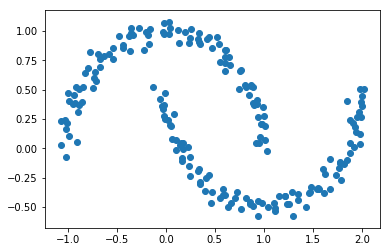

In [14]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)
plt.scatter(X[:, 0], X[:, 1]);

Q: Do you think k_means will do well on these clusters? Why? No! It can't detect non-convex shapes.

There is only one way to find out: 

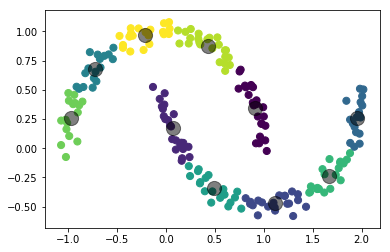

In [17]:
kmeans = KMeans(n_clusters=10)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
centers = kmeans.cluster_centers_
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

### A fun example: k-means on digits

We will start by loading the digits and then finding the ``KMeans`` clusters.
Recall that the digits consist of 1,797 samples with 64 features, where each of the 64 features is the brightness of one pixel in an 8×8 image:

In [18]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

The clustering can be performed as we did before:

In [19]:
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

(10, 64)

The result is 10 clusters in 64 dimensions.
Notice that the cluster centers themselves are 64-dimensional points, and can themselves be interpreted as the "typical" digit within the cluster.
Let's see what these cluster centers look like:

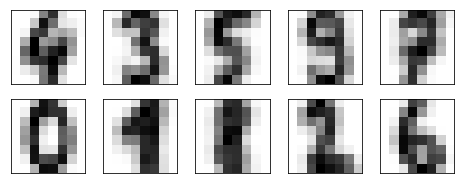

In [20]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

We see that *even without the labels*, ``KMeans`` is able to find clusters whose centers are recognizable digits, with perhaps the exception of 1 and 8.

There is a lot more about using k-means in [this notebook](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.11-K-Means.ipynb), including a great example of dimensionality reduction for color images and a brick-and-mortar implementation of k-means algorithm. I strongly recommend reading it all!

### Figuring out the number of clusters: Elbow Method

The idea is to look for an optimal number of clusters by finding a compromise between lower inertia (SSE) and lower number of clusters. Personally I am quite skeptical :/

In [24]:
inertias = []
for k in range(2, 50):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(digits.data)
    inertias.append(kmeans.inertia_)

Text(0.5, 1.0, 'Elbow curve')

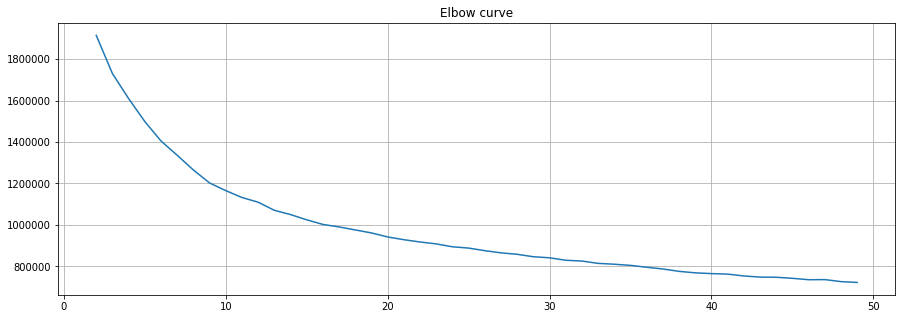

In [23]:
fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 50), inertias)
plt.grid(True)
plt.title('Elbow curve')

We can take a look at clustering algorithms here:

https://scikit-learn.org/stable/modules/clustering.html